# VapoRock fractional vaporization


In [1]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

In [2]:
# BSE composition from Schaefer & Fegley (TiO2 neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04}


In [3]:
system = vaporock.System(vapor_database='JANAF0')
# system = vaporock.System(vapor_database='LAMOR')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

MELTS liquid components:


/opt/conda/lib/python3.9/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/conda/lib/python3.9/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/conda/lib/python3.9/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/conda/lib/python3.9/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

[('SiO2', 0.09376302671600419),
 ('TiO2', 0.0),
 ('Al2O3', 0.02427604939215259),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.03002944129782759),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.23815793315057002),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.03529746281790487),
 ('Na2SiO3', 0.002957188086717984),
 ('KAlSiO4', 0.00044474936870234484),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [4]:
T = 2200.0
P = 1e-10
buffer = 'IW'
dlogfO2 = +1.5
dlogfO2 = 0
logfO2 = vaporock.redox_buffer(T, buffer=buffer, dlogfO2=dlogfO2)

In [5]:
logP =  system.eval_gas_abundances(T, logfO2)

In [7]:
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP)

In [8]:
mol_elem_frac

2200.0
O   8.674852e-02
Mg  1.359198e-02
Ca  2.420239e-07
Al  3.856470e-07
Si  8.232864e-02
Na  6.950409e-01
K   4.963003e-02
Fe  7.264299e-02
Ti  3.057664e-11
Cr  1.634180e-05

In [9]:
system.print_melt_comp()

MELTS liquid components:


[('SiO2', 0.09376302671600419),
 ('TiO2', 0.0),
 ('Al2O3', 0.02427604939215259),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.03002944129782759),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.23815793315057002),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.03529746281790487),
 ('Na2SiO3', 0.002957188086717984),
 ('KAlSiO4', 0.00044474936870234484),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [11]:
logP, sys_comp = system.fractionate(T, logfO2)

In [12]:
logP

0.0
species_name           
O(g)          -5.486538
O2(g)         -5.836846
Mg(g)         -4.257379
MgO(g)        -6.668429
Mg2(g)       -12.504578
Ca(g)         -9.012419
CaO(g)       -10.783390
Ca2(g)       -21.276609
Al(g)         -9.540513
AlO(g)        -8.892147
AlO2(g)      -11.451450
Al2(g)       -20.009142
Al2O(g)      -12.285940
Al2O2(g)     -12.966873
Si(g)        -10.299049
SiO(g)        -3.475623
SiO2(g)       -5.770948
Si2(g)       -18.957984
Si3(g)       -26.534018
Na(g)         -2.547051
NaO(g)        -6.316951
Na2(g)        -7.596201
K(g)          -3.693313
KO(g)         -7.442606
K2(g)        -10.039243
Fe(g)         -3.541771
FeO(g)        -5.026877
TiO(g)       -14.550164
Ti(g)        -18.844809
TiO2(g)      -12.913502
Cr(g)         -7.517167
CrO(g)        -7.573053
CrO2(g)       -8.017854
CrO3(g)      -11.062525

In [ ]:
Ptotal = np.sum(10**logP, axis=0)
# Ptotal

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

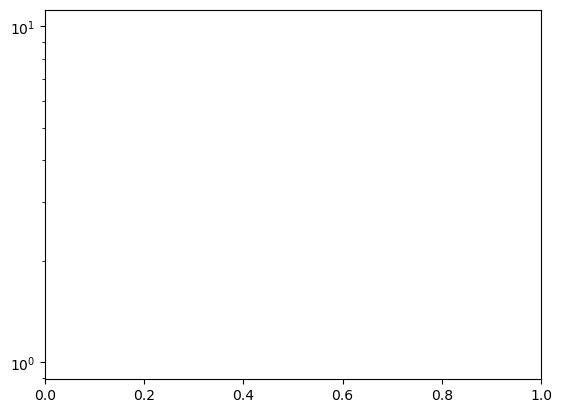

In [ ]:
plt.figure()
plt.semilogy(T, Ptotal, 'k-')
plt.xlabel('T  [K]')
plt.ylabel('Total Pressure   [bars]')

In [ ]:
plt.rc('axes', prop_cycle=(cycler(linestyle=['-', '--', ':', '-.'])*
                           cycler(color=['c','m','k','y','r','g','b'])))

In [ ]:
plt.figure()
plt.semilogy(T, mol_elem_frac.T.values)
plt.legend(mol_elem_frac.index)

plt.xlabel('Temperature [K]')
plt.ylabel('Elemental Abundance [mol fraction]')


In [ ]:

# linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
# plt.rc('axes', prop_cycle=linestyle_cycler)

plt.figure(figsize=(6,8))
plt.semilogy(T, density_high.T.values);
plt.ylim(1e15,1e20)
plt.xlim(1499,3001)
plt.legend(list(density_high.index), bbox_to_anchor=(1.05, 1))
plt. xlabel('Temperature [K]')
plt.ylabel(r'Column Density [mol / cm$^2$]')